In [3]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals


In [4]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
# import os
# import shutil
# import random
# import glob
from matplotlib import pyplot as plt
# import warnings
import seaborn as sns
# warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
# Create train, validation and test subsets
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
  os.makedir('train/dog')
  os.makedir('train/cat')
  os.makedir('valid/dog')
  os.makedir('valid/cat')
  os.makedir('test/dog')
  os.makedir('test/cat')

  for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
  for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
  for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
  for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
  for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
  for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')

os.chdir('../../')


In [14]:
#set paths 
train_path = '/content/drive/MyDrive/Cats_Dogs/train'
valid_path = '/content/drive/MyDrive/Cats_Dogs/valid'
test_path = '/content/drive/MyDrive/Cats_Dogs/test'

In [15]:
# 
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [41]:
# 
train_img, train_label = next(train_batches)
valid_img, valid_label = next(valid_batches)

In [17]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

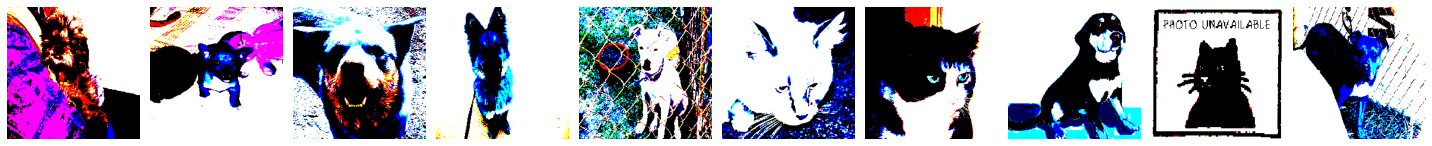

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [19]:
plotImages(img)
print(labels)

Import the pre-trained model

In [20]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [21]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
# Create sequential model with layers set to layers of vgg16
model = keras.Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [29]:
# Prevent alteration of model
for layer in model.layers:
  layer.trainable = False

In [30]:
# add output layer
model.add(layers.Dense(units=2, activation = 'softmax'))

In [31]:
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# fit model
model.fit(train_img, train_label, epochs=5, verbose=2, validation_data=(valid_img, valid_label))

Epoch 1/5
1/1 - 9s - loss: 0.1635 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 0.8000 - 9s/epoch - 9s/step
Epoch 2/5
1/1 - 9s - loss: 0.1539 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.8000 - 9s/epoch - 9s/step
Epoch 3/5
1/1 - 9s - loss: 0.1433 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 0.8000 - 9s/epoch - 9s/step
Epoch 4/5
1/1 - 9s - loss: 0.1322 - accuracy: 1.0000 - val_loss: 0.2274 - val_accuracy: 0.8000 - 9s/epoch - 9s/step
Epoch 5/5
1/1 - 9s - loss: 0.1210 - accuracy: 1.0000 - val_loss: 0.2248 - val_accuracy: 0.8000 - 9s/epoch - 9s/step


In [ ]:
# 